In [1]:
import numpy as np
import meshplot as mp

In [2]:
import igl
import scipy as sp
import numpy as np
from meshplot import plot, subplot, interact
import time
import copy
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append('../src')

In [4]:
import importlib, utils, laplacian_utils, mean_curvature_flow, remesher_helper
importlib.reload(utils)
importlib.reload(laplacian_utils)
importlib.reload(mean_curvature_flow)
importlib.reload(remesher_helper)
from utils import parse_input_mesh, normalize_area, get_diverging_colors, remesh
from mean_curvature_flow import MCF

In [5]:
epsilon1 = 5e-3  # relative change threshold
epsilon2 = 1e-3  # absolute value of mean curvature
mesh_color = np.array([0, 0.7, 1])

### Example 1

In [6]:
v1, f1, num_bdry_vx, num_intr_vx = parse_input_mesh("../data/two_rings_remesh.obj")
curr_mcf = MCF(num_bdry_vx, num_intr_vx)

In [7]:
start = time.time()
vs1, average_mean_curvature_list1 = curr_mcf.run_mean_curvature_flow(v1, f1, 100, epsilon1, epsilon2)
print("Run {} iterations of unstable mean curvature flow".format(len(average_mean_curvature_list1)))
print("took {} seconds".format(time.time() - start))

/opt/homebrew/anaconda3/envs/gc_course_env/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/opt/homebrew/anaconda3/envs/gc_course_env/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:215: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


Insufficient improvement from the previous iteration!
Run 16 iterations of unstable mean curvature flow
took 87.82522487640381 seconds


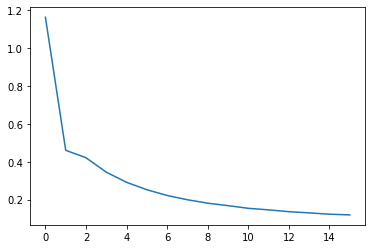

In [8]:
plt.plot(average_mean_curvature_list1)
plt.savefig('average_mean_curvature_1')

In [9]:
p1 = mp.plot(vs1[-1], f1, shading={"wireframe": False,"width": 900, "height": 600}, return_plot=True, c=mesh_color)

@interact(level=(0, len(vs1)-1))
def mcf(level=0):
    p1.update_object(vertices=vs1[level])

/opt/homebrew/anaconda3/envs/gc_course_env/lib/python3.9/site-packages/jupyter_client/session.py:716: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


Renderer(camera=PerspectiveCamera(aspect=1.5, children=(DirectionalLight(color='white', intensity=0.6, positio…

interactive(children=(IntSlider(value=0, description='level', max=15), Output()), _dom_classes=('widget-intera…

In [10]:
p1.update_object(vertices=vs1[len(vs1)-1])
p1.save('figure_1')

Plot saved to file figure_1.html.


### Example 2

In [5]:
epsilon1 = 5e-3  # relative change threshold
epsilon2 = 1e-3  # absolute value of mean curvature
v2, f2, num_bdry_vx, num_intr_vx = parse_input_mesh("../data/half_cube_remesh.obj")
curr_mcf = MCF(num_bdry_vx, num_intr_vx)

In [6]:
start = time.time()
vs2, average_mean_curvature_list2 = curr_mcf.run_mean_curvature_flow(v2, f2, 1000, epsilon1, epsilon2)
print("Run {} iterations of unstable mean curvature flow".format(len(average_mean_curvature_list2)))
print("took {} seconds".format(time.time() - start))

NameError: name 'L' is not defined

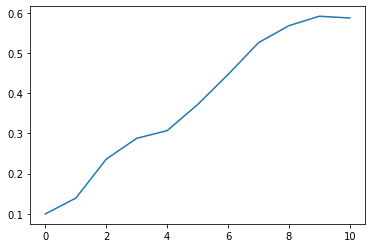

In [13]:
plt.plot(average_mean_curvature_list2)
plt.savefig('average_mean_curvature_2')

In [14]:
p2 = mp.plot(vs2[0], f2, shading={"wireframe": False, "flat": True}, c=mesh_color)

@interact(level=(0, len(vs2)-2))
def mcf(level=0):
    p2.update_object(vertices=vs2[level])

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, -0.0…

interactive(children=(IntSlider(value=0, description='level', max=9), Output()), _dom_classes=('widget-interac…

In [15]:
p2.update_object(vertices=vs2[len(vs2)-2])
p2.save('figure_2')

Plot saved to file figure_2.html.


### Example 3

In [23]:
epsilon1 = 5e-4  # relative change threshold
epsilon2 = 1e-3  # absolute value of mean curvature
v3, f3, num_bdry_vx, num_intr_vx = parse_input_mesh("../data/cube_remesh.obj")
curr_mcf = MCF(num_bdry_vx, num_intr_vx)

In [24]:
start = time.time()
vs3, average_mean_curvature_list3 = curr_mcf.run_mean_curvature_flow(v3, f3, 1000, epsilon1, epsilon2)
print("Run {} iterations of unstable mean curvature flow".format(len(average_mean_curvature_list3)))
print("took {} seconds".format(time.time() - start))

Insufficient improvement from the previous iteration!
Run 13 iterations of unstable mean curvature flow
took 235.2695710659027 seconds


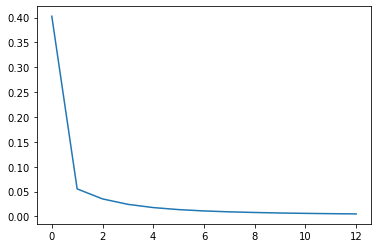

In [25]:
plt.plot(average_mean_curvature_list3)
plt.savefig('average_mean_curvature_3')

In [31]:
p3 = mp.plot(vs3[-1], f3, shading={"wireframe": False, "flat": True}, c=mesh_color)

@interact(level=(0, len(vs3)-2))
def mcf(level=0):
    p3.update_object(vertices=vs3[level])

/opt/homebrew/anaconda3/envs/gc_course_env/lib/python3.9/site-packages/jupyter_client/session.py:716: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, 0.0,…

interactive(children=(IntSlider(value=0, description='level', max=11), Output()), _dom_classes=('widget-intera…

In [39]:
p3.update_object(vertices=vs3[len(vs3)-2])
p3.save('figure_3')

Plot saved to file figure_3.html.


In [37]:
len(vs3)

13

## Your Own Minimal Surface!

### Visualize your blender output


In [ ]:
blender_input_filename = ""

In [ ]:
v,f = igl.read_triangle_mesh(blender_input_filename)
p1 = plot(v, f, shading={"wireframe": True,"width": 900, "height": 600}, return_plot=True, c=mesh_color)

### Remesh

The input should be a triangle mesh or a quad mesh. This might takes a while depends on your design. You can adjust the `mesh_size` parameter in the `remesh` function.

In [ ]:
remesh_output_name = ""
remesh(blender_input_filename, remesh_output_name)

In [ ]:
v,f = igl.read_triangle_mesh(remesh_output_name)
p2 = plot(v, f, shading={"wireframe": True,"width": 900, "height": 600}, return_plot=True, c=mesh_color)

### Run optimization